In [1]:
import pandas as pd
import numpy as np

In [2]:
cprr = pd.read_excel("{경로}/cp1.xls")
cprl = pd.read_excel("{경로}/cp2.xls")

In [3]:
cpr = pd.concat([cprr,cprl])

In [4]:
cpr

,일자,국고채권\n(1년)
0,최고,2.541
1,최저,0.591
2,2022-06-15,2.541
3,2022-06-14,2.451
4,2022-06-13,2.416
...,...,...
1235,2012-06-20,3.300
1236,2012-06-19,3.290
1237,2012-06-18,3.300
1238,2012-06-15,3.270


In [5]:
kill1 = cpr[cpr['일자'].str.contains('최고')].index
kill2 = cpr[cpr['일자'].str.contains('최저')].index
cpr.drop(kill1,inplace=True)
cpr.drop(kill2,inplace=True)
#최저최고 제거

In [6]:
cpr

,일자,국고채권\n(1년)
2,2022-06-15,2.541
3,2022-06-14,2.451
4,2022-06-13,2.416
5,2022-06-10,2.290
6,2022-06-09,2.234
...,...,...
1235,2012-06-20,3.300
1236,2012-06-19,3.290
1237,2012-06-18,3.300
1238,2012-06-15,3.270


In [8]:
kospi = pd.read_csv("{경로}/kospi_index.csv", encoding = 'utf-8')

In [9]:
kospi

,Unnamed: 0,종가,오픈,고가,저가,변동 %,날짜
0,0,520.95,503.31,521.34,500.97,3.24,2001-01-02
1,1,521.43,512.74,524.58,510.70,0.09,2001-01-03
2,2,558.02,551.53,567.16,550.91,7.02,2001-01-04
3,3,580.85,559.54,581.41,555.40,4.09,2001-01-05
4,4,586.65,573.72,587.91,572.48,1.00,2001-01-08
...,...,...,...,...,...,...,...
5289,5289,2612.45,2616.99,2641.91,2602.01,-0.18,2022-05-26
5290,5290,2638.05,2640.75,2644.71,2631.49,0.98,2022-05-27
5291,5291,2669.66,2662.31,2672.74,2654.18,1.20,2022-05-30
5292,5292,2685.90,2666.88,2685.90,2654.32,0.61,2022-05-31


In [10]:
cpr1 = cpr.rename({'일자':'날짜'},axis=1)

In [12]:
cpr1

,날짜,국고채권\n(1년)
2,2022-06-15,2.541
3,2022-06-14,2.451
4,2022-06-13,2.416
5,2022-06-10,2.290
6,2022-06-09,2.234
...,...,...
1235,2012-06-20,3.300
1236,2012-06-19,3.290
1237,2012-06-18,3.300
1238,2012-06-15,3.270


In [13]:
cnk = pd.merge(left = cpr1, right = kospi, how = 'outer' , on = '날짜')

In [14]:
cnk

,날짜,국고채권\n(1년),Unnamed: 0,종가,오픈,고가,저가,변동 %
0,2022-06-15,2.541,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-06-14,2.451,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-06-13,2.416,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-06-10,2.290,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-06-09,2.234,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5306,2012-06-07,NaN,2834.0,1847.95,1839.49,1853.20,1839.49,2.56
5307,2012-06-08,NaN,2835.0,1835.64,1854.00,1854.59,1832.83,-0.67
5308,2012-06-11,NaN,2836.0,1867.04,1860.90,1869.33,1859.74,1.71
5309,2012-06-12,NaN,2837.0,1854.74,1840.56,1857.93,1840.10,-0.66


In [15]:
cnk1 = cnk.dropna()

In [16]:
cnk1

,날짜,국고채권\n(1년),Unnamed: 0,종가,오픈,고가,저가,변동 %
8,2022-06-02,2.181,5293.0,2658.99,2670.74,2674.00,2653.59,-1.00
9,2022-05-31,2.163,5292.0,2685.90,2666.88,2685.90,2654.32,0.61
10,2022-05-30,2.131,5291.0,2669.66,2662.31,2672.74,2654.18,1.20
11,2022-05-27,2.137,5290.0,2638.05,2640.75,2644.71,2631.49,0.98
12,2022-05-26,2.129,5289.0,2612.45,2616.99,2641.91,2602.01,-0.18
...,...,...,...,...,...,...,...,...
2467,2012-06-20,3.300,2843.0,1904.12,1908.19,1908.19,1895.27,0.65
2468,2012-06-19,3.290,2842.0,1891.77,1885.56,1895.32,1883.56,0.00
2469,2012-06-18,3.300,2841.0,1891.71,1892.91,1901.11,1887.05,1.81
2470,2012-06-15,3.270,2840.0,1858.16,1871.48,1871.48,1847.19,-0.71


In [17]:
cnk2 = cnk1[['날짜','국고채권\n(1년)', '변동 %' ]]

In [19]:
cnk2

,날짜,국고채권\n(1년),변동 %
8,2022-06-02,2.181,-1.00
9,2022-05-31,2.163,0.61
10,2022-05-30,2.131,1.20
11,2022-05-27,2.137,0.98
12,2022-05-26,2.129,-0.18
...,...,...,...
2467,2012-06-20,3.300,0.65
2468,2012-06-19,3.290,0.00
2469,2012-06-18,3.300,1.81
2470,2012-06-15,3.270,-0.71


In [22]:
cnk2['국채대비 주식수익률'] = cnk2['변동 %']-cnk2['국고채권\n(1년)']

C:\Users\asxs0\AppData\Local\Temp/ipykernel_36920/3091950932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnk2['국채대비 주식수익률'] = cnk2['변동 %']-cnk2['국고채권\n(1년)']


In [23]:
cnk2

,날짜,국고채권\n(1년),변동 %,국채대비 주식수익률
8,2022-06-02,2.181,-1.00,-3.181
9,2022-05-31,2.163,0.61,-1.553
10,2022-05-30,2.131,1.20,-0.931
11,2022-05-27,2.137,0.98,-1.157
12,2022-05-26,2.129,-0.18,-2.309
...,...,...,...,...
2467,2012-06-20,3.300,0.65,-2.650
2468,2012-06-19,3.290,0.00,-3.290
2469,2012-06-18,3.300,1.81,-1.490
2470,2012-06-15,3.270,-0.71,-3.980


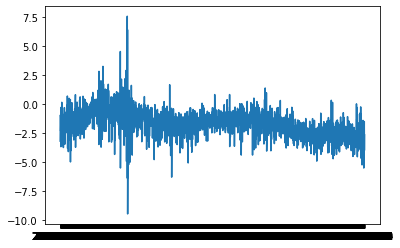

In [25]:
import matplotlib.pyplot as plt

plt.plot(cnk2['날짜'], cnk2['국채대비 주식수익률']) 

In [26]:
cnk2.to_csv("safe haven.csv", mode='a')